###  K-평균 알고리즘


- 군집화에서 가장 일반적으로 사용되는 알고리즘  
- 특정 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법


- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- 단점
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
    - 반복 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 군집을 선택할지 가이드하기 어려움

#### k-평균을 이용한 붓꽃 데이터 세트 군집화

In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=['sepal_lenth','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_lenth,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
iris_df['cluster'] = kmeans.labels_

In [18]:
iris_df['target'] = iris.target

iris_df.groupby(['target','cluster'])['sepal_lenth'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_lenth, dtype: int64

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

iris_df['pca_x'] = iris_pca[:,0]
iris_df['pca_y'] = iris_pca[:,1]

iris_df.head()

,sepal_lenth,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


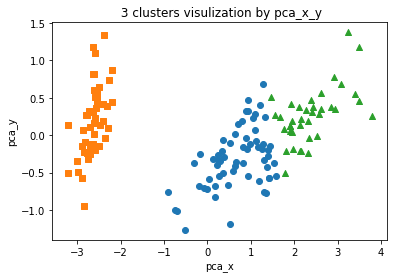

In [35]:
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

plt.scatter(x = iris_df.loc[marker0_ind, 'pca_x'], y = iris_df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = iris_df.loc[marker1_ind, 'pca_x'], y = iris_df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x = iris_df.loc[marker2_ind, 'pca_x'], y = iris_df.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.title(' 3 clusters visulization by pca_x_y')
plt.show()

#### clustering 알고리즘 테스트를 위한 데이터 생성

In [51]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- n_samples : 생성할 총 데이터의 개수
- n_features : 데이터으 ㅣ피처 개수, 시각화를 목표로 할 경우 2개로 설정해 첫 번째 피처는 X좌표, 두 번째 피처는 Y좌표에 표현
- centers : 군집의 개수, ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
- cluster_std : 생성될 군집 데이터의 표준 편차

In [63]:
import pandas as pd

cluster_df = pd.DataFrame(X, columns=['ftr_1','ftr_2'])
cluster_df['target'] = y
cluster_df.head()

,ftr_1,ftr_2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


##### make_blob()으로 만들어진 데이터 포인트들을 시각화

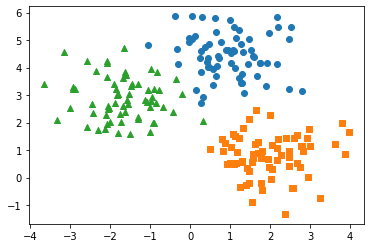

In [79]:
target_list = np.unique(y)

markers = ['o','s','^']

for i in target_list:
    target_cluster = cluster_df[cluster_df['target'] == i]
    plt.scatter(x = target_cluster['ftr_1'], y = target_cluster['ftr_2'],marker=markers[i])
    
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels 
cluster_df

,ftr_1,ftr_2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


In [85]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^']

for i in unique_labels:
    cluster_df['kmeans_label'] == label

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])